# Prediction Engine:

I am importing require libraries to find some relationship between book name and book types based on some features.

In [108]:
import networkx as nx
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
from nltk.corpus import stopwords as sw
import matplotlib.pyplot as plt
import urllib.request
import warnings
import codecs
import nltk
import string
from textblob import TextBlob
from IPython.display import Image
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import re
from decimal import Decimal, ROUND_HALF_EVEN
warnings.simplefilter(action='ignore', category=FutureWarning)
import pickle # For storing our data object in file system for latter use
pd.set_option('display.max_colwidth',100)

In [109]:
import seaborn as sns
import random
from nltk.classify import apply_features
import plotly.plotly as py
import plotly.graph_objs as go

Loading the data with book title and the occorence of first letters, last letters, and first two letters of the book titles and values. 

In [110]:
#load data with book
First_df = pd.read_csv('Book_first.csv', encoding = 'unicode_escape')
First_df = pd.DataFrame(First_df)
First_df.head()

,Label,Value,first_letter,Last_letter,first_two,last_two
0,1000 Years for Revenge,n,1,e,10,ge
1,Bush vs. the Beltway,c,b,y,bu,ay
2,Charlie Wilson's War,c,c,r,ch,ar
3,Losing Bin Laden,c,l,n,lo,en
4,Sleeping With the Devil,n,s,l,sl,il


Creating bargraph of liberal, conservative, and neutral books appeared on the first letters to find the patterns of which letters shows more apperance on which types of books. 

In [111]:
liberal = First_df[First_df['Value']=='l']
conservative = First_df[First_df['Value']=='c']
neutral = First_df[First_df['Value']=='n']

liberal = liberal.groupby('first_letter').count().reset_index(drop=False)
liberal['percent'] = liberal['Value']*100/105
liberal = pd.DataFrame(liberal)
liberal = liberal.iloc[1:,:]

conservative = conservative.groupby('first_letter').count().reset_index(drop=False)
conservative['percent'] = conservative['Value']*100/105
conservative = pd.DataFrame(conservative)


neutral = neutral.groupby('first_letter').count().reset_index(drop=False)
neutral['percent'] = neutral['Value']*100/105
neutral = pd.DataFrame(neutral)

data_l = go.Bar(
            x=liberal['first_letter'],
            y=liberal['percent'],
            name='liberal'
    )



data_c = go.Bar(
            x=conservative['first_letter'],
            y=conservative['percent'],
            name='conservative'
)

data_n = go.Bar(
            x=neutral['first_letter'],
            y=neutral['percent'],
            name='neutral'
    )

data = [data_l, data_c, data_n]
layout = go.Layout(
    title='Percentage of first Letters in Book Names',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



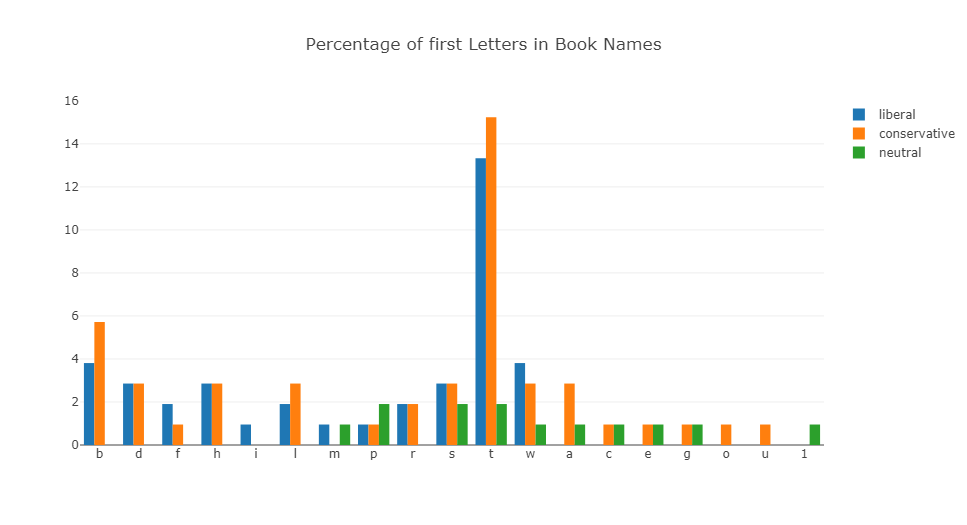

In [112]:
from IPython.display import Image
Image(filename='newplot1.png') 


The graph above showed here the letter 't' appeared most in the first letter of the leberal book names. Also, the letter 'b' and 'w' appered second most in the liberal books. Similarly, the letter 't' appeared most also in the first letter of the conservative book names. And the letter 'b' appeared second most of the conservative book names. Letter 'p', 's', and 't' appered most in neutral books. 

Creating bargraph of liberal, conservative, and neutral books to show which last letter appeared most to the names of the books. 

In [113]:
liberal = First_df[First_df['Value']=='l']
conservative = First_df[First_df['Value']=='c']
neutral = First_df[First_df['Value']=='n']

liberal = liberal.groupby('Last_letter').count().reset_index(drop=False)
liberal['percent'] = liberal['Value']*100/105
liberal = pd.DataFrame(liberal)
liberal = liberal.iloc[1:,:]

conservative = conservative.groupby('Last_letter').count().reset_index(drop=False)
conservative['percent'] = conservative['Value']*100/105
conservative = pd.DataFrame(conservative)


neutral = neutral.groupby('Last_letter').count().reset_index(drop=False)
neutral['percent'] = neutral['Value']*100/105
neutral = pd.DataFrame(neutral)

data_l = go.Bar(
            x=liberal['Last_letter'],
            y=liberal['percent'],
            name='liberal'
    )



data_c = go.Bar(
            x=conservative['Last_letter'],
            y=conservative['percent'],
            name='conservative'
)

data_n = go.Bar(
            x=neutral['Last_letter'],
            y=neutral['percent'],
            name='neutral'
    )

data = [data_l, data_c, data_n]
layout = go.Layout(
    title='Percentage of Last Letters in Book Names',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



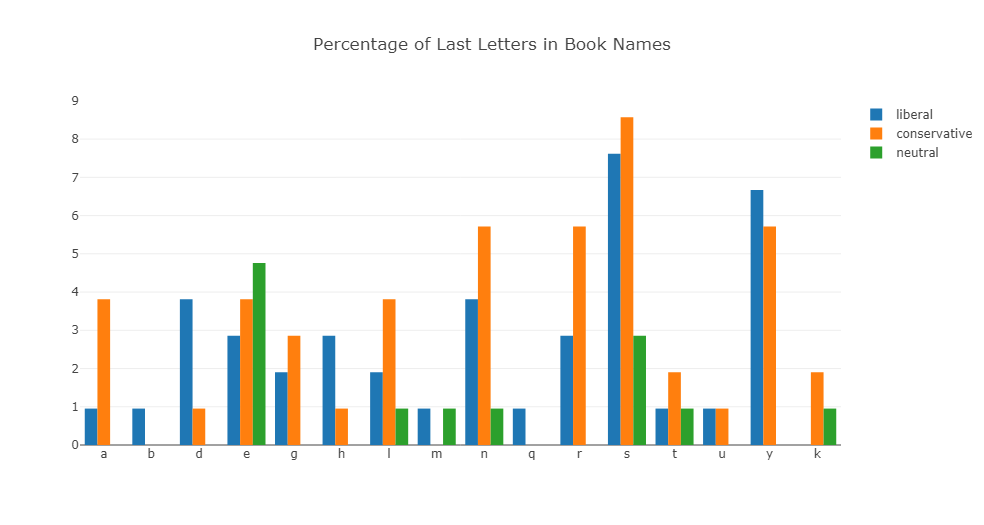

In [114]:
Image(filename='newplot2.png') 

The graph above showed here that the letter 's' appeared most in the last letter of the conservative book names. Also, the letter 'n', 'r', and 'y' appered second most in the conservative books. Similarly, the letter 's' appeared most also in the last letter of the liberal book names. And the letter 'y' appeared second most of the last letter of the conservative book names. Letter 'e' appered most in neutral books. 

Creating bargraph of liberal, conservative, and neutral books appeared on the first two letters to find the patterns of which letters shows more apperance on which types of books. 

In [115]:
liberal = First_df[First_df['Value']=='l']
conservative = First_df[First_df['Value']=='c']
neutral = First_df[First_df['Value']=='n']

liberal = liberal.groupby('first_two').count().reset_index(drop=False)
liberal['percent'] = liberal['Value']*100/105
liberal = pd.DataFrame(liberal)
liberal = liberal.iloc[1:,:]

conservative = conservative.groupby('first_two').count().reset_index(drop=False)
conservative['percent'] = conservative['Value']*100/105
conservative = pd.DataFrame(conservative)


neutral = neutral.groupby('first_two').count().reset_index(drop=False)
neutral['percent'] = neutral['Value']*100/105
neutral = pd.DataFrame(neutral)

data_l = go.Bar(
            x=liberal['first_two'],
            y=liberal['percent'],
            name='liberal'
    )



data_c = go.Bar(
            x=conservative['first_two'],
            y=conservative['percent'],
            name='conservative'
)

data_n = go.Bar(
            x=neutral['first_two'],
            y=neutral['percent'],
            name='neutral'
    )

data = [data_l, data_c, data_n]
layout = go.Layout(
    title='Percentage of First two Letters in Book Names',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



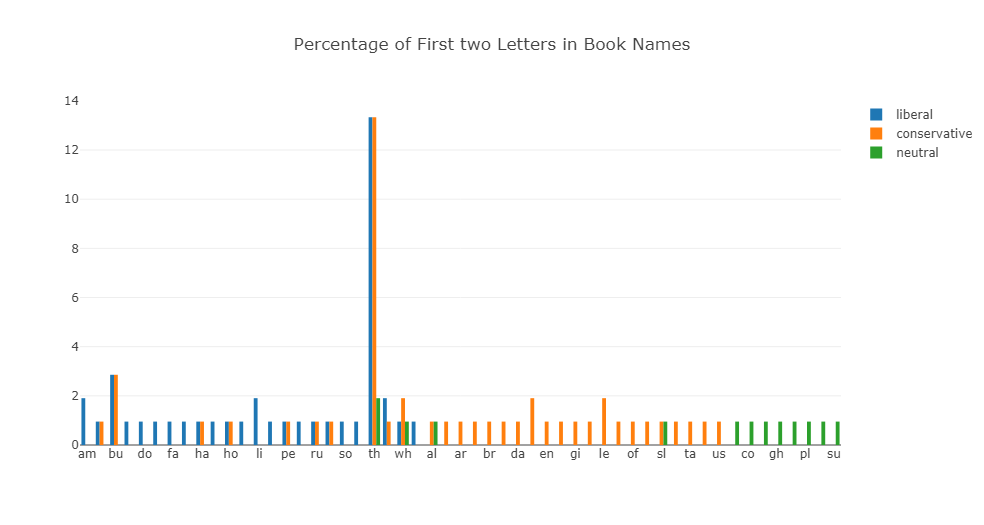

In [116]:
Image(filename='newplot3.png') 

The graph above showed that the letter 'th' appeared most in the first two letter of the conservative book names. Also, the letter 'bu' appered second most in the conservative books. Similarly, the letter 'th' appeared most also in the first two letter of the liberal book names. And the letter 'bu' appeared second most of the first two letter of the conservative book names. Letter 'th' appered most in neutral books. 

In [117]:
liberal = First_df[First_df['Value']=='l']
conservative = First_df[First_df['Value']=='c']
neutral = First_df[First_df['Value']=='n']

liberal = liberal.groupby('last_two').count().reset_index(drop=False)
liberal['percent'] = liberal['Value']*100/105
liberal = pd.DataFrame(liberal)
liberal = liberal.iloc[1:,:]

conservative = conservative.groupby('last_two').count().reset_index(drop=False)
conservative['percent'] = conservative['Value']*100/105
conservative = pd.DataFrame(conservative)


neutral = neutral.groupby('last_two').count().reset_index(drop=False)
neutral['percent'] = neutral['Value']*100/105
neutral = pd.DataFrame(neutral)

data_l = go.Bar(
            x=liberal['last_two'],
            y=liberal['percent'],
            name='liberal'
    )



data_c = go.Bar(
            x=conservative['last_two'],
            y=conservative['percent'],
            name='conservative'
)

data_n = go.Bar(
            x=neutral['last_two'],
            y=neutral['percent'],
            name='neutral'
    )

data = [data_l, data_c, data_n]
layout = go.Layout(
    title='Percentage of Last two Letters in the Book Names',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



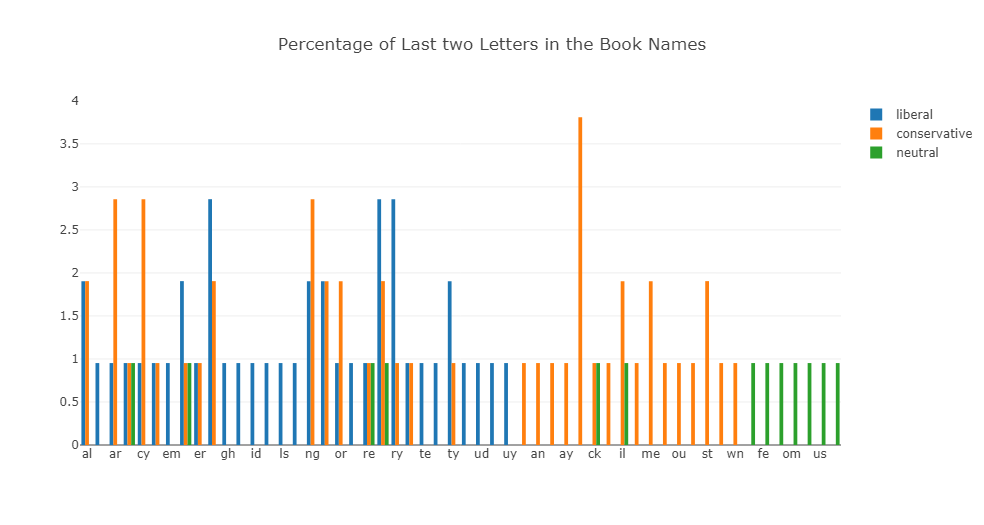

In [118]:
Image(filename='newplot4.png') 

The graph above showed that the letter 'ca' appeared most in the last letter of the conservative book names. Also, the letter 'ar','cy', and 'ng' appered second most in the conservative books. On the other hand, the letter 'es', 'rs', and 'ry' appeared most in the last letter of the liberal book names. And the letter 'al', 'en', 'ng','on', and 'ty' appeared second most of the last two letter of the conservative book names. Letter 'ce', 'en', 're', 'rs' and others nine last two letters appered most in neutral books.